  1) I will use the same dataset as HW 1, which contains data about images of oranges and grapefruits (It is already cleaned). 

[Link: https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit ]

Much of the code used in this section was loosely based on the article below, but modified to fit my own dataset.

[Link: https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/ ]


0.9023333333333333


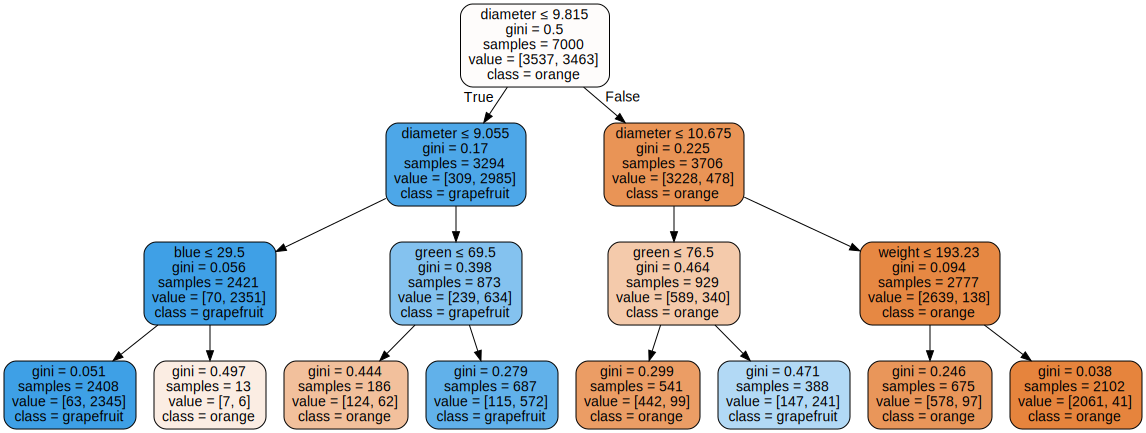

In [28]:
# Import TensorFlow, Pandas, and Numpy
import tensorflow as tf
import pandas as pd
import numpy as np
import math

#read in data and print first few values
data = pd.read_csv('citrus.csv')
data.head()

#split into training and testing
from sklearn.model_selection import train_test_split
X = data.drop('name',axis=1)
y = data[['name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

#run decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
model.fit(X_train,y_train)

#test our accuracy
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_predict))

#visual representation of the model
target = list(data['name'].unique())
feature_names = list(X.columns)
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

1 (continued): One of the most noticeable parameters I messed with was the maximum number of layers the tree could have. Turning it up to, say, 5 meant the model was slightly more accurate at predicting the correct y value, but the graph became large and confusing. This meant that the model was starting to overfit the data. Similarly, turning the max depth down to 1 or 2 lowered the accuracy of the model, while also making it very easy to understand. This is a classic example of Bias-Variance tradeoff, as the more accurate model was less intuitive, and the more general model was incorrect more often.

2) I used a Random Forest Algorithm for the bagging portion. A large portion of the first part of this code was inspired by the article linked below (the same one linked in class), but with parameters adjusted to fit my data.

[Link: https://machinelearningmastery.com/random-forest-ensemble-in-python/ ]

I also used an Adaboost Algorithm for the boosting portion. Again, I got help from the article below, but adjusted values to make it my own.

[Link: https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30 ]

In [29]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada_X,ada_Y = make_classification(n_samples=100, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, random_state=102)
clf = AdaBoostClassifier(n_estimators=10, random_state=0, algorithm='SAMME')
clf.fit(ada_X, ada_Y)  
n_scores = cross_val_score(clf, ada_X, ada_Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.954 (0.006)
Accuracy: 0.910 (0.094)


2 (continued): Both models saw an improvement over the original in terms of accuracy, but with the tradeoff of a larger runtime. Additionally, the extra steps it takes to make a more robust model does make it slightly less generalizeable, but overall both are better than the original. Of the two, Random Forest seems to perform better, as it has a higher accuracy and lower standard deviation. However, the fact that the algorithm itself takes much longer to run, and may be slightly overfitting, means that in practice you would want to use the AdaBoost algorithm for evaluating new data.

3) The metric I chose to measure throughout this homework was Accuracy. Because the dataset has an even distribution of both oranges and grapefruit, neither label should have priority over the other in terms of which errors to reduce. That is to say, false positives and false negatives are equally as bad for this dataset. If I were to use another metric such as Precision to minimize only false positives of oranges, the model would likely start guessing grapefruit a disproportionate amount of time unless it was absolutely sure it has a true positive. Alternatively, if I used Sensitivity as a metric to minimize false negatives of grapefruits, the model would similarly start leaning towards oranges instead. Therefore, I chose to use accuracy as a metric so as to maximize only true positives and true negatives.

In terms of comparing the three algorithms with eachother, they all reached around the same level of accuracy. In general, the longer the algorithm took to run, the higher its accuracy score became. However, having a high accuracy score should not be the only way to evaluate a model, as blindly trying to maximize accuracy can lead to overfitting. With this in mind, it is somewhat subjective which algorithm is best, as the only way to test it would be to provide it with data it has never seen before. Overall, the three models are all helpful, but each has certain superior qualities that could be argued to make it the best.